In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

In [2]:
file = "dataw3\\heart.csv"
heart = pd.read_csv(file)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.shape

(303, 14)

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
corr_matrix = heart.corr()

corr_matrix["target"].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [8]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
category_features = ['sex', 'cp', 'fbs', 'restecg','exang','slope', 'ca', 'thal'] 
target = ['target']

C:\Users\Rove Labs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


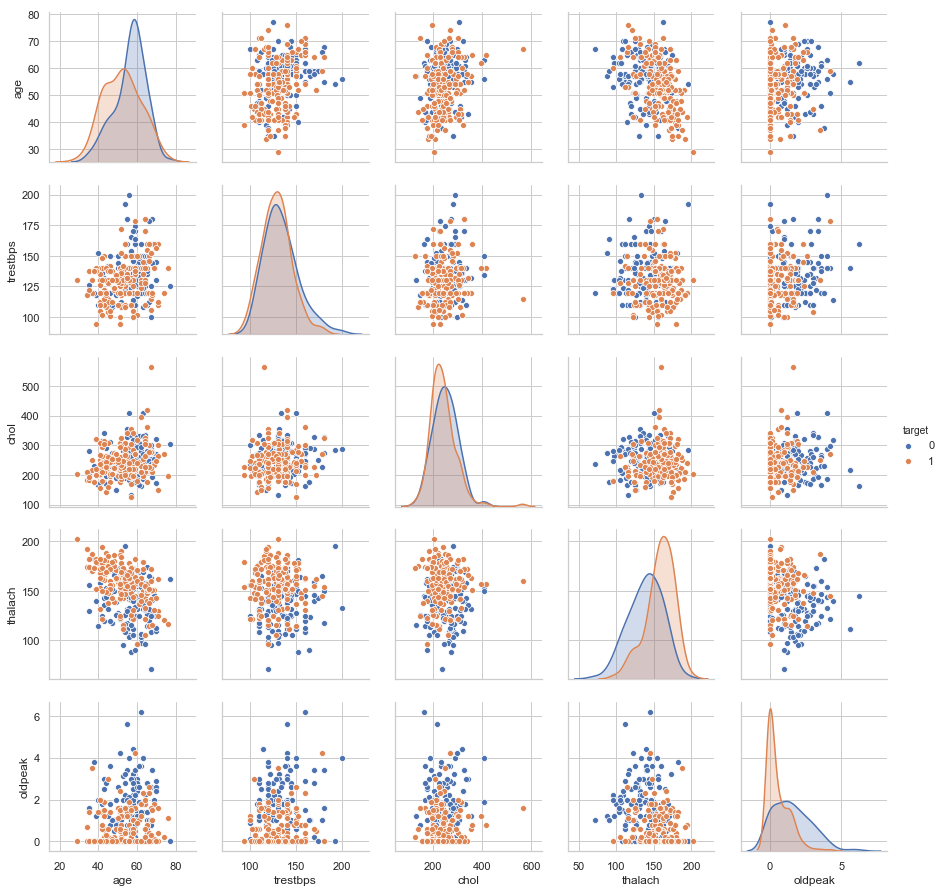

In [12]:
s = sns.pairplot(vars = numeric_features, data=heart, hue = "target")

In [14]:
X = heart.drop(["target"], axis=1)
y = heart["target"]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                     test_size = 0.2, random_state = 5)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

In [18]:
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),   
        ('std_scaler', StandardScaler()),
    ])

In [19]:
cat_pipeline = Pipeline([
        ("cat_encoder", OneHotEncoder()),
    ])

In [21]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
category_features = ['sex', 'cp', 'fbs', 'restecg','exang','slope', 'ca', 'thal'] 
target = ['target']

In [22]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numeric_features),
        ("cat", cat_pipeline, category_features),
    ])

In [23]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.fit_transform(X_test)

In [26]:
print(X_train_prepared.shape, X_test_prepared.shape)

(242, 30) (61, 30)


### Dimensionality Reductin (PCA)

#### Finding the no of principle components maintaining 95% Varience

In [61]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_prepared)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print("Maximum no fo components to reduce to 95% Variance : ", d)

Maximum no fo components to reduce to 95% Variance :  15


##### Directly converting by passing the no components value between 0.0 - 1.0 (represent the ratio of varience)

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)             # 0.0 - 1.0
X_reduced = pca.fit_transform(X_train_prepared)

X_reduced.shape

(242, 15)

#### Using Random Forest Classifier with cross validation after PCA

In [53]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, 
                                 max_depth = 5, random_state=42)
rnd_clf.fit(X_reduced, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=16, n_estimators=50,
                       random_state=42)

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

cross_accuracy_rnd = cross_val_score(rnd_clf, X_reduced, y_train, 
                               cv=5, scoring="accuracy")
cross_precision_rnd = cross_val_score(rnd_clf, X_reduced, y_train, 
                               cv=5, scoring="precision")
cross_recall_rnd = cross_val_score(rnd_clf, X_reduced, y_train, 
                               cv=5, scoring="recall")

print("Accuracy : ", cross_accuracy_rnd.mean())
print("Precision : ", cross_precision_rnd.mean())
print("Recall : ", cross_recall_rnd.mean())

Accuracy :  0.769047619047619
Precision :  0.7905591397849463
Recall :  0.7994301994301993


### For test Values

In [66]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score

In [67]:
X_test_reduced = pca.fit_transform(X_test_prepared)

In [68]:
y_test_pred_rnd = rnd_clf.predict(X_test_prepared)

print("Accuracy :", accuracy_score(y_test, y_test_pred_rnd))
print("Pricision :", precision_score(y_test, y_test_pred_rnd))
print("Recall after :", recall_score(y_test, y_test_pred_rnd))
print("f1_score after :", f1_score(y_test, y_test_pred_rnd))

Accuracy : 0.8688524590163934
Pricision : 0.8285714285714286
Recall after : 0.9354838709677419
f1_score after : 0.8787878787878788
